In [1]:
from utils import *

In [2]:
JOBPATH = "/tiger/u/lando/cmeta/536397/log.json"
velocities = [
    1.9945,
    0.8706,
    1.0050,
    1.3350,
    0.9838,
    1.6856,
    1.1260,
    0.6883,
    0.6403,
    1.3221,
]

In [3]:
jobpathdash = JOBPATH.replace("/", "-")
localpath = f"/tmp/{jobpathdash}"

import os
x = os.system(f"scp lando@sc.stanford.edu:{JOBPATH} {localpath}")
assert x == 0
lines = read_log(localpath)
print(f"Found {len(lines)} lines")
print(f"File at {localpath}")

Found 27332 lines
File at /tmp/-tiger-u-lando-cmeta-536397-log.json


In [4]:
tasklines = split_lines_by_tasks(lines)
print(f"Found {len(tasklines)} tasks")

Found 10 tasks


In [5]:
warmups = []
slbos = []
real_warms = []
virt_warms = []
reals, virts = [], []
for taskline in tasklines:
    warmup, slbo = extract_rewards(taskline)
    warmups.append(warmup)
    slbos.append(slbo)
    real_warm, virt_warm = get_warmup(taskline)
    real_warms.append(real_warm)
    virt_warms.append(virt_warm)
    real, virt = get_checkpoints(taskline)
    reals.append(real)
    virts.append(virt)

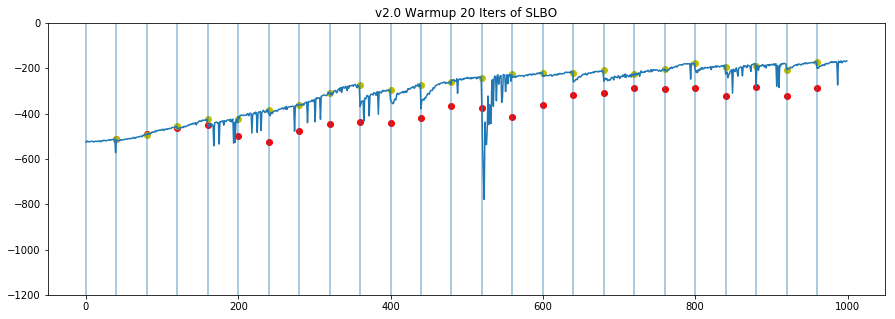

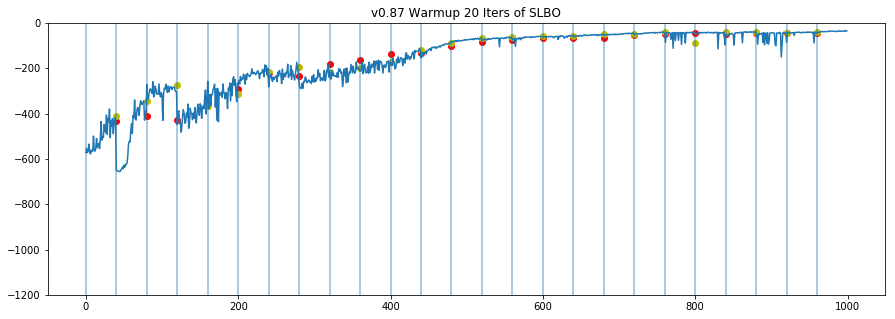

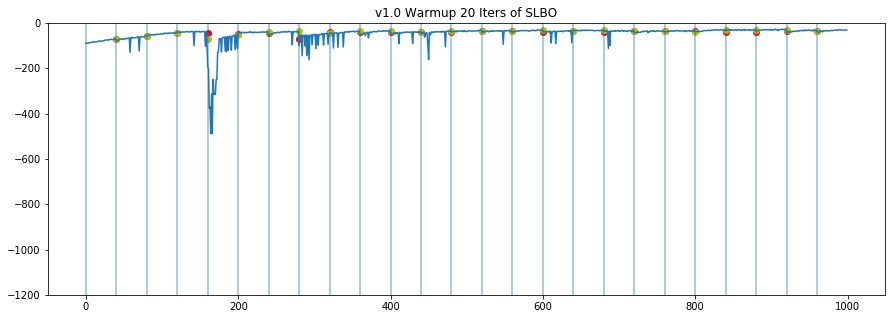

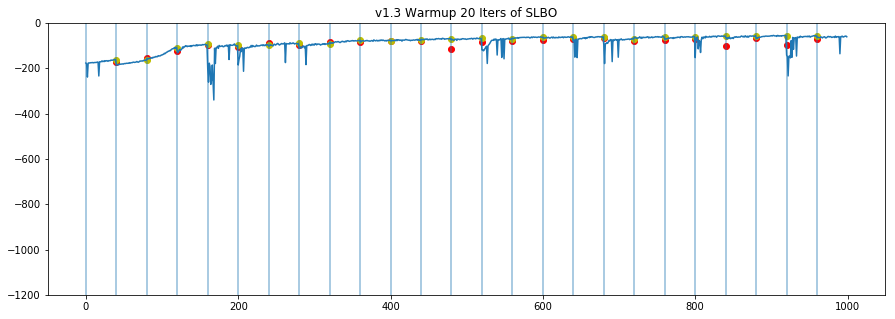

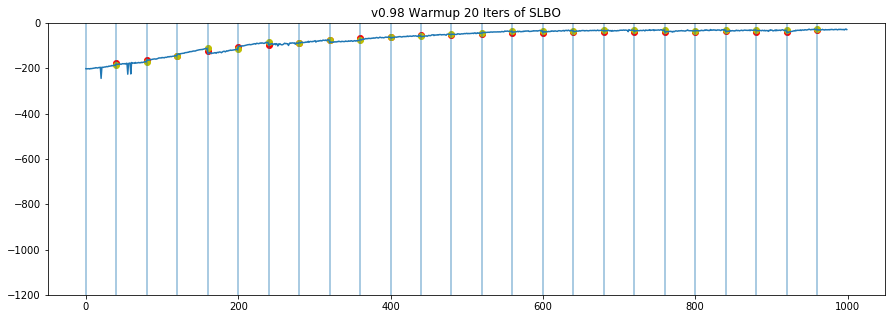

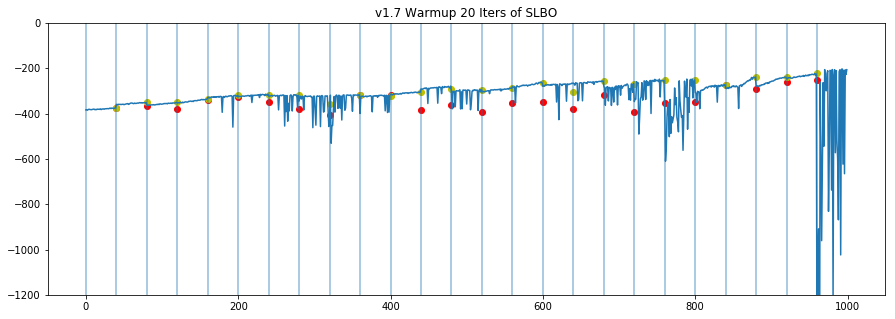

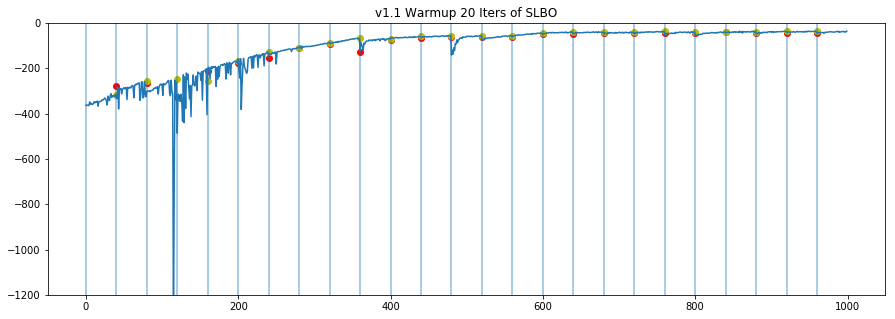

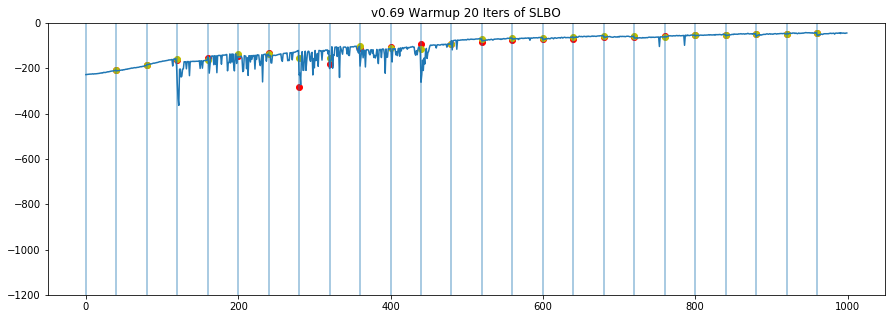

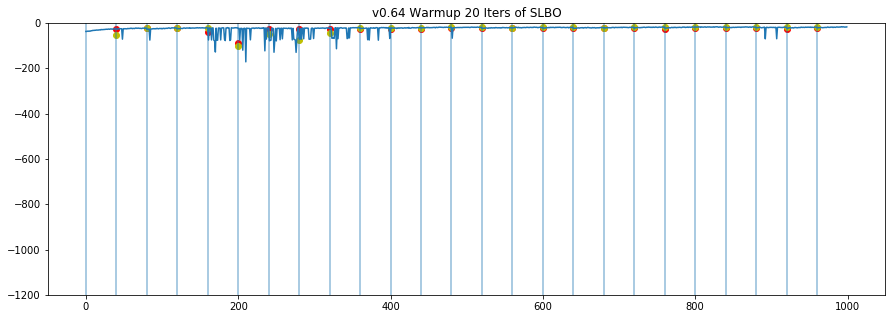

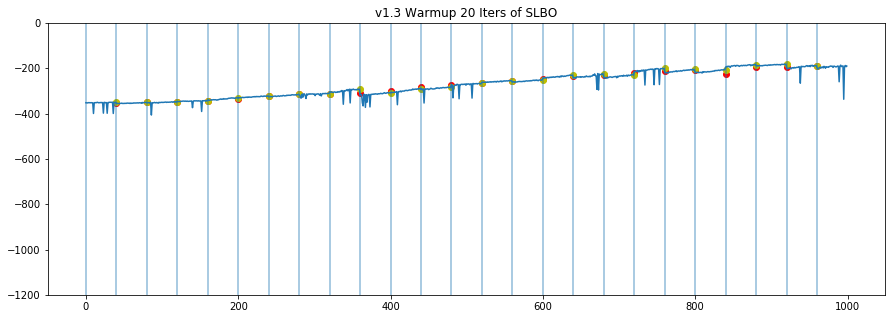

In [6]:
%matplotlib inline
for (vel, warmup, real_warm, virt_warm) in zip(velocities, warmups, real_warms, virt_warms):
    fig, ax = plt.subplots(figsize=(15, 5))
    plot_stage(ax, warmup[0], 25, 40, ylim=(-1200, 0))
    warm_iters = len(real_warm)
    ax.scatter([(i+1)*40 for i in range(0, warm_iters)], real_warm, color="r")
    ax.scatter([(i+1)*40 for i in range(0, warm_iters)], virt_warm, color="y")
    #ax.axhline(y=MAXRFORVEL, color="orange")
    ax.set_title(f"v{vel:.2} Warmup 20 Iters of SLBO")

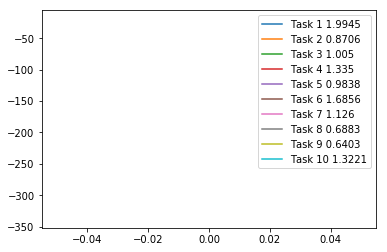

In [7]:
i = 1
for (vel, real) in zip(velocities, reals):
    plt.plot(real, label=f"Task {i} {vel}")
    i +=1 
plt.legend()